<a href="https://colab.research.google.com/github/Nihal-Awad/Iris-Flower-Classification-using-ML/blob/main/Iris_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Flower Classification using Logistic Regression, K-Nearest Neighbors, Support Vector Machine and Decision Tree.**
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements.
## **Problem Statement**
The task is to train a machine learning model to classify iris species based on their measurements.

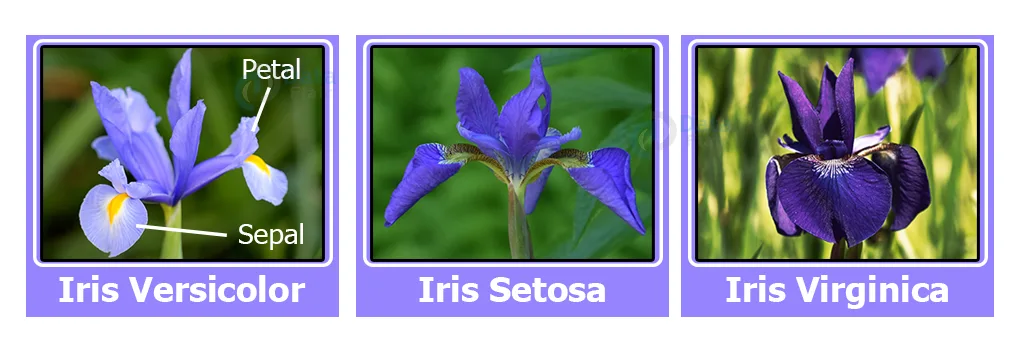

## **Import the libraries**

In [83]:
# Setup
from google.colab import drive, files

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score

## **Loading the dataset from Kaggle**

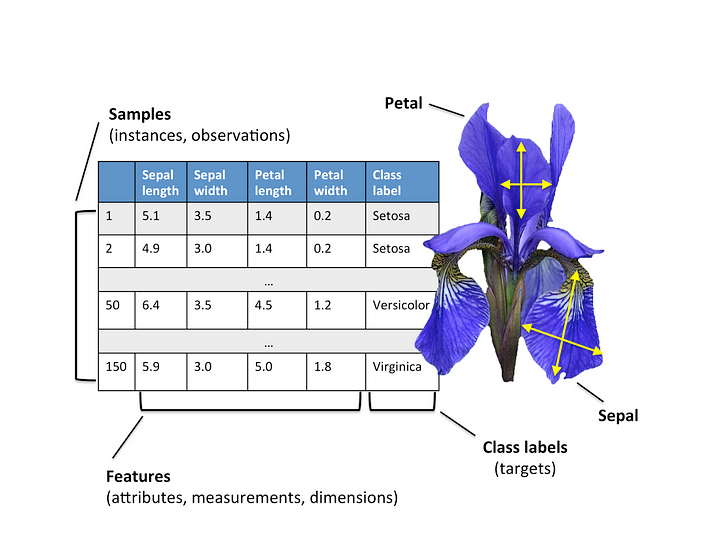

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nihalasghayyu","key":"77960c83b03b48cbd0cf2981531c3d6a"}'}

In [7]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Aug 12 17:52 kaggle.json


In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!pwd

/content


In [11]:
!kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          10539        406  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           2708        111  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            559         25  1.0              
joebeachcapital/top-500-hollywood-m

In [12]:
!kaggle datasets download -d arshid/iris-flower-dataset -p /content/drive/MyDrive/iris-flower-classification

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 2.21MB/s]


In [21]:
path = '/content/drive/MyDrive/iris-flower-classification/iris-flower-dataset/IRIS.csv'

In [25]:
iris = pd.read_csv(path)
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## **Data exploration and manipulation**

In [28]:
iris.shape

(150, 5)

In [33]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
corr = iris.corr()
corr

<ipython-input-62-3de38ac09aeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [35]:
print('Target Labels: ', iris['species'].unique())

Target Labels:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [34]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

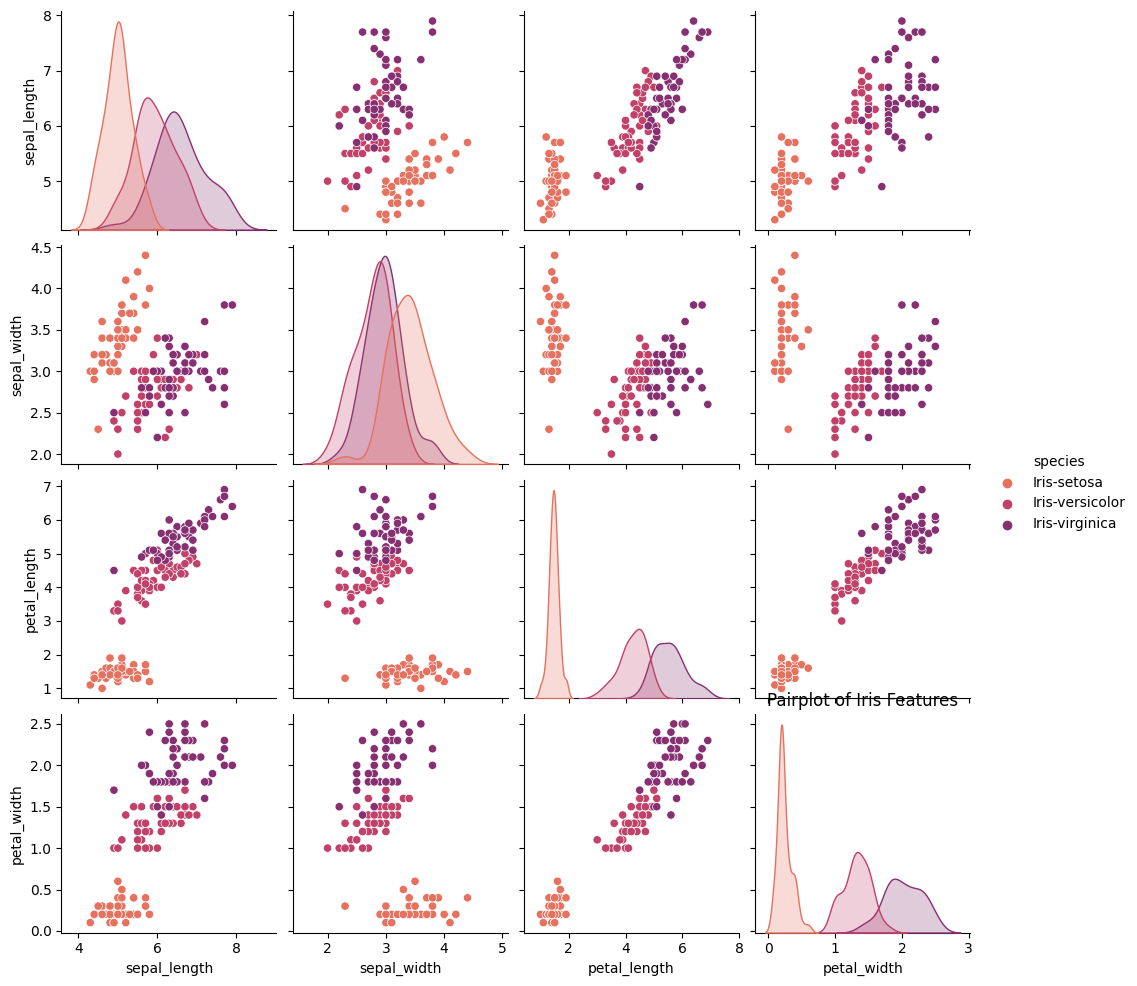

In [60]:
sns.pairplot(iris, palette='flare', hue='species')
plt.title('Pairplot of Iris Features')
plt.show()

<Axes: >

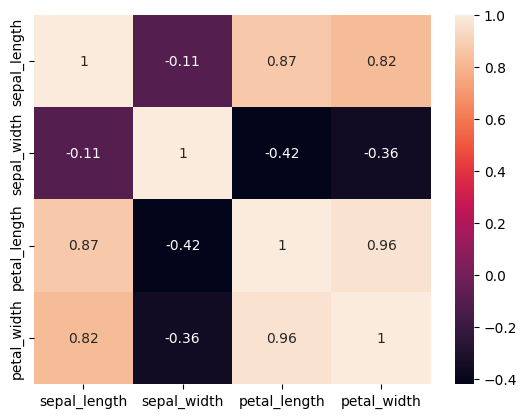

In [65]:
sns.heatmap(corr, annot=True)

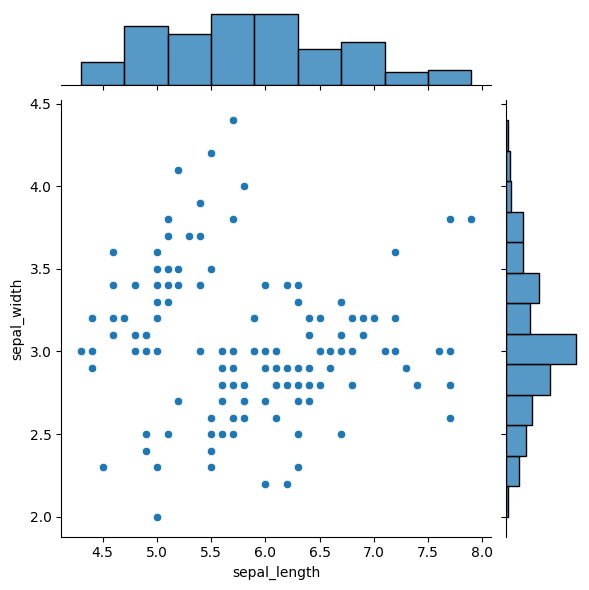

In [160]:
# Relationship between sepal length and sepal width
sns.jointplot(data=iris, x ='sepal_length', y='sepal_width')

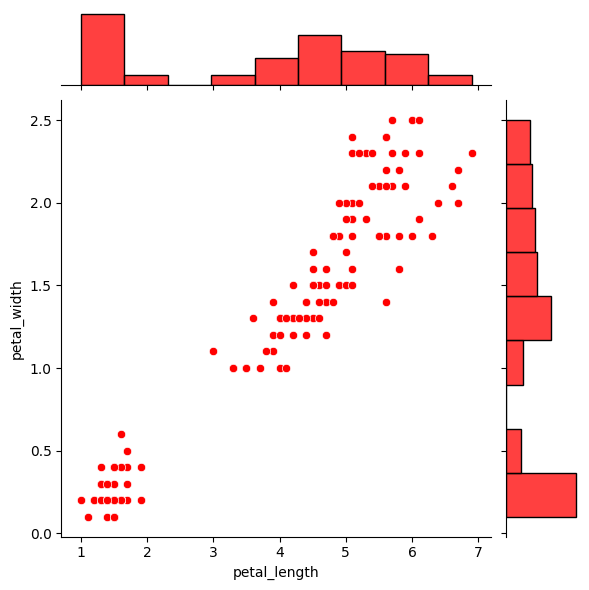

In [161]:
# Relationship between petal length and sepal width
sns.jointplot(data=iris, x ='petal_length', y='petal_width', color='red')

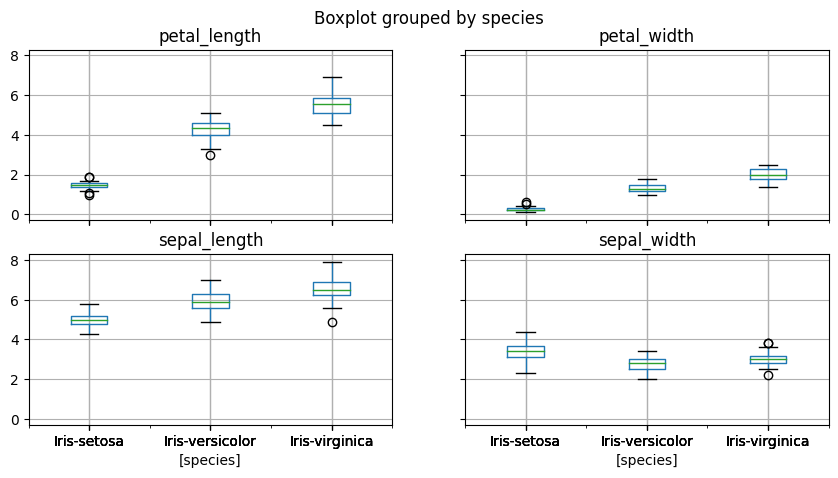

In [165]:
iris.boxplot(by='species', figsize=(10, 5));

In [69]:
X = iris.drop("species", axis=1).values
y = iris["species"].values

In [70]:
# Calculate average of each features for all classes
y_data = np.array([np.average(X[:, i][y == j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(y))])
y_data_reshaped = y_data.reshape(4, 3)
y_data_reshaped = np.swapaxes(y_data_reshaped, 0, 1)
X_axis = np.arange(len(iris.columns) - 1)
width = 0.25

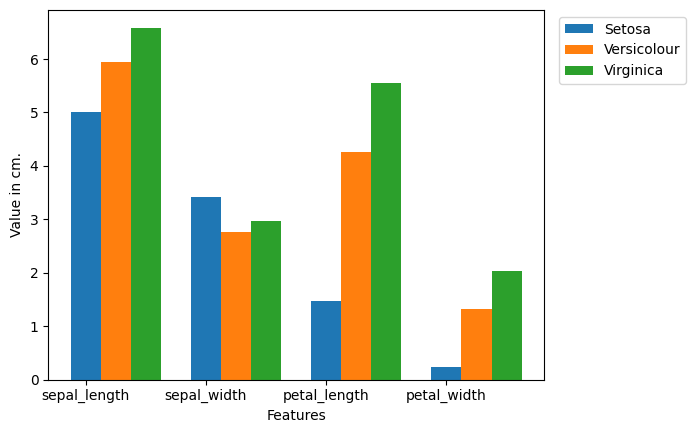

In [71]:
# Plot the average
plt.bar(X_axis, y_data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, y_data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, y_data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, iris.columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

## **Iris Classification models**


1.   Logistic Regression
2.   KNN
3.   DT
4.   SVM





In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size=0.2)

In [173]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print('Logistic Regression accuracy: ', accuracy_score(y_test, predictions) * 100)

Logistic Regression accuracy:  96.66666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
# lr
lr_predict = lr.predict(X_test)
# comparing the test dataset and predictions
compare_iris = pd.DataFrame({'Actual labels': y_test, 'Predicted labels': lr_predict})
compare_iris = compare_iris.reset_index(drop=True)
compare_iris.head(10)

,Actual labels,Predicted labels
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa
5,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-virginica
9,Iris-versicolor,Iris-versicolor


In [174]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print('KNN accuracy: ', accuracy_score(y_test, predictions) * 100)

KNN accuracy:  100.0


In [175]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)
print('DT accuracy: ', accuracy_score(y_test, predictions) * 100)

DT accuracy:  96.66666666666667


In [176]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print('SVM accuracy: ', accuracy_score(y_test, predictions) * 100)

SVM accuracy:  96.66666666666667


## **Making predictions**

In [154]:
# knn
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [157]:
# svm
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = svm.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [158]:
# dt
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = dt.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [178]:
# lr
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = lr.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


## **Best Model**

In [181]:
best_model_selection = pd.DataFrame({'Model': ['LR', 'SVM', 'KNN', 'DT'], 'Score': [96.66, 96.66, 100.0, 96.66]})
best_model_selection.sort_values(by='Score', ascending=False, inplace=True)
best_model_selection.set_index('Score', inplace=True)
best_model_selection

,Model
Score,
100.00,KNN
96.66,LR
96.66,SVM
96.66,DT
